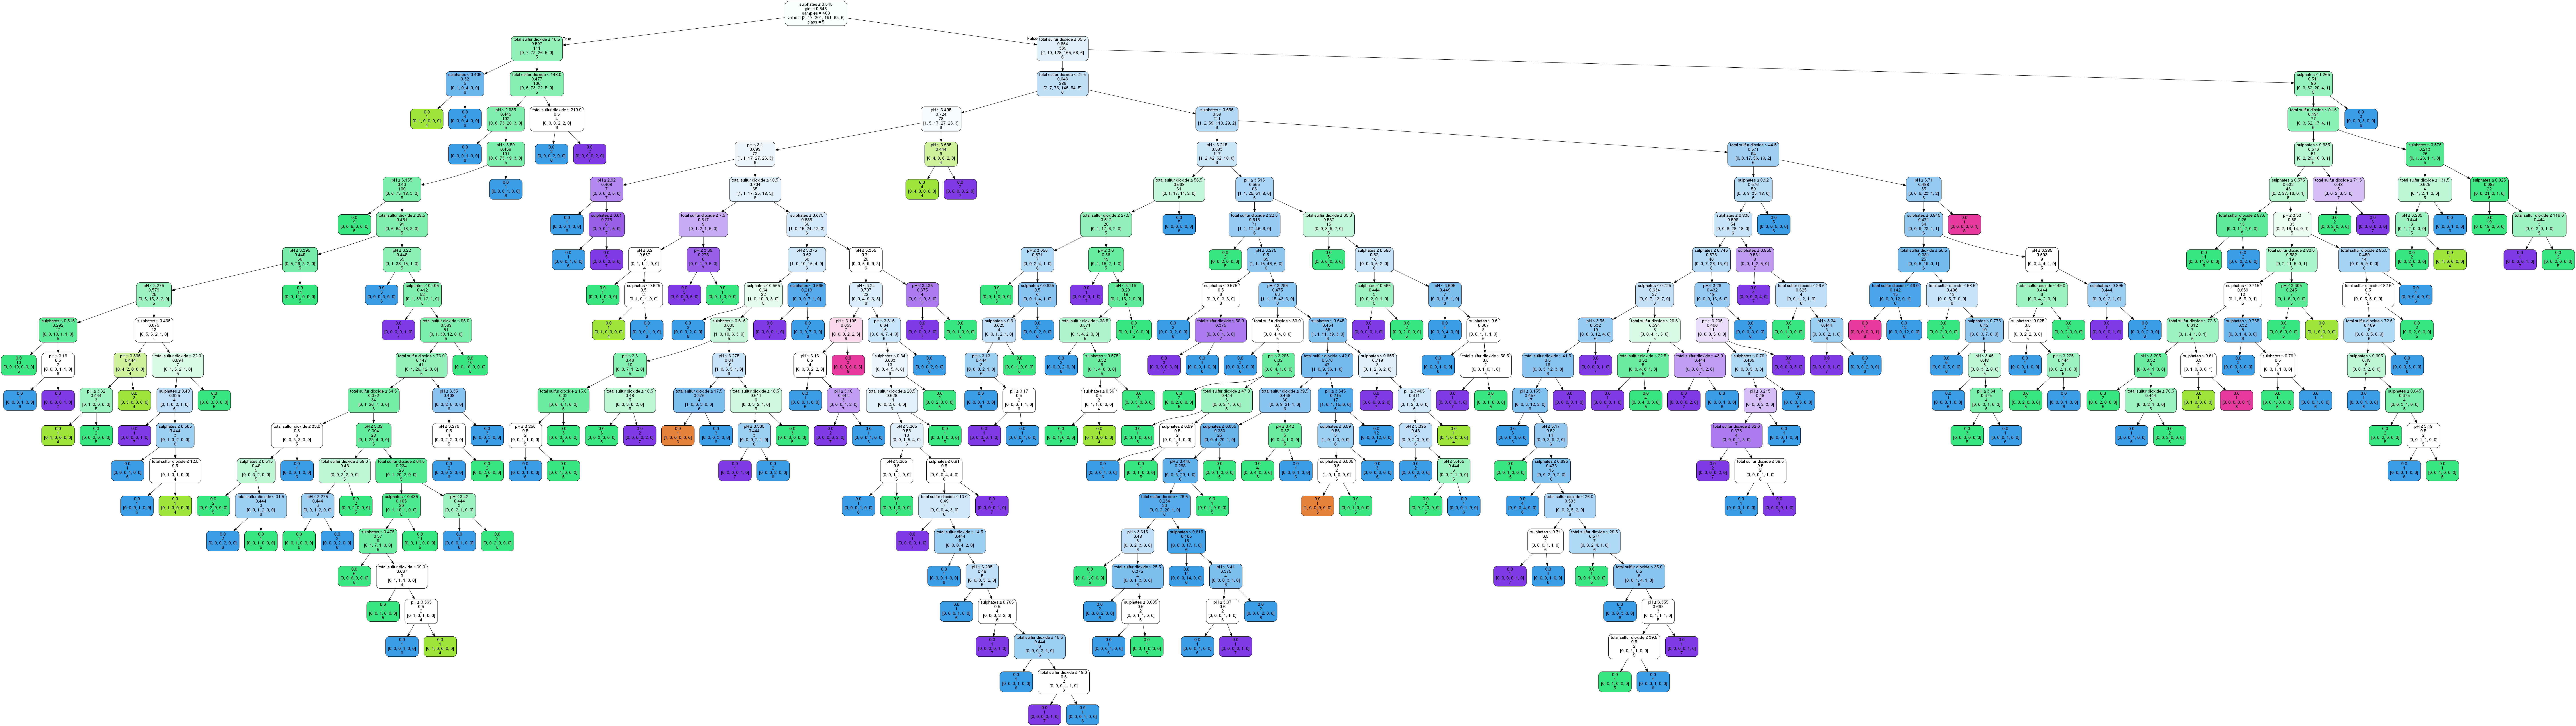

In [9]:
import csv
import os
import pydotplus
from IPython.display import Image
from sklearn.cross_validation import train_test_split
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"
import graphviz 

# 開啟 CSV 檔案
with open('winequality-red01.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
    wines = csv.DictReader(csvfile)
    wines_x=[]
    wines_y=[]
    for wine in wines:
        wines_x.append([ wine['total sulfur dioxide'], wine['pH'], 
            wine['sulphates']])
        wines_y.append(wine['quality'])
    
# 切分訓練與測試資料
train_X, test_X, train_Y, test_Y = train_test_split(wines_x, wines_y, test_size = 0.3)

#建立分類器 - 決策樹
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(test_X, test_Y)

winefeature_names=['total sulfur dioxide','pH','sulphates']
winetarget_names=['3','4','5','6','7','8']

dot_data = tree.export_graphviz(clf, out_file=None, max_depth=None,
                                feature_names=winefeature_names,
                                label='root',
                                class_names=winetarget_names,  
                                filled=True, rounded=True,
                                special_characters=True)


#畫圖 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  